# WeatherPy

In [82]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import random
import requests
import json
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# # Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
# Creating variable lists to store API response information

cityfound = []
lat = []
lng = []
maxtemp = []
humid = []
cloud = []
wind = []
country = []
date = []


# Base Url

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

#Print the data from base url 

print("-----------------------------------------")
print("Beginning Data Retrieval")
print("-----------------------------------------\n")

# initialize counters for Record (city) and Set
citynum =0
setnum  =1 

for city in cities:
    
    cityurl = url + "&q=" + city   
    
    print(f"Processing Record {citynum} of Set {setnum} | {city}")
   
    
    try:
        response =  requests.get(cityurl).json()

        maxtemp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        #cityfound.append(response['name'])
        cityfound.append(city)
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
            
    except KeyError:
        print('City not found, skipping...')
            
    # increase counters for Record (city) and Set
    citynum = citynum + 1 
    if (citynum >= 50):      # city number to be reset every 50 cases
        citynum = 0
        setnum = setnum + 1 

print(f'Total number of random cities found in openweathermap application is {len(lat)}.')        
print("-----------------------------------------")
print("Data Retrieval Complete")
print("-----------------------------------------")


-----------------------------------------
Beginning Data Retrieval
-----------------------------------------

Processing Record 0 of Set 1 | severo-kurilsk
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | muros
Processing Record 3 of Set 1 | mahebourg
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | illoqqortoormiut
City not found, skipping...
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | guaratinga
Processing Record 9 of Set 1 | belushya guba
City not found, skipping...
Processing Record 10 of Set 1 | ituni
City not found, skipping...
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | nguiu
City not found, skipping...
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | dingle
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | monte alegre
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | 

Processing Record 34 of Set 4 | sentyabrskiy
City not found, skipping...
Processing Record 35 of Set 4 | tsihombe
City not found, skipping...
Processing Record 36 of Set 4 | bambous virieux
Processing Record 37 of Set 4 | la trinidad
Processing Record 38 of Set 4 | hobyo
Processing Record 39 of Set 4 | nokaneng
Processing Record 40 of Set 4 | havoysund
Processing Record 41 of Set 4 | beringovskiy
Processing Record 42 of Set 4 | victoria
Processing Record 43 of Set 4 | tuatapere
Processing Record 44 of Set 4 | taonan
Processing Record 45 of Set 4 | sovetskiy
Processing Record 46 of Set 4 | ahuimanu
Processing Record 47 of Set 4 | sarangpur
Processing Record 48 of Set 4 | praia
Processing Record 49 of Set 4 | nabire
Processing Record 0 of Set 5 | onalaska
Processing Record 1 of Set 5 | traverse city
Processing Record 2 of Set 5 | batagay
Processing Record 3 of Set 5 | rognan
Processing Record 4 of Set 5 | carutapera
Processing Record 5 of Set 5 | grindavik
Processing Record 6 of Set 5 | 

Processing Record 24 of Set 8 | burnie
Processing Record 25 of Set 8 | kavaratti
Processing Record 26 of Set 8 | marcona
City not found, skipping...
Processing Record 27 of Set 8 | nome
Processing Record 28 of Set 8 | salalah
Processing Record 29 of Set 8 | provideniya
Processing Record 30 of Set 8 | saleaula
City not found, skipping...
Processing Record 31 of Set 8 | ndende
Processing Record 32 of Set 8 | mugur-aksy
Processing Record 33 of Set 8 | kastamonu
Processing Record 34 of Set 8 | thinadhoo
Processing Record 35 of Set 8 | nizhniy kuranakh
Processing Record 36 of Set 8 | sanandaj
Processing Record 37 of Set 8 | wulanhaote
City not found, skipping...
Processing Record 38 of Set 8 | igarka
Processing Record 39 of Set 8 | bardiyah
Processing Record 40 of Set 8 | itaueira
Processing Record 41 of Set 8 | kodinsk
Processing Record 42 of Set 8 | mitsamiouli
Processing Record 43 of Set 8 | zima
Processing Record 44 of Set 8 | sorland
Processing Record 45 of Set 8 | hay river
Processing

City not found, skipping...
Processing Record 13 of Set 12 | miramar
Processing Record 14 of Set 12 | sydney mines
Processing Record 15 of Set 12 | matara
Processing Record 16 of Set 12 | kamenka
Processing Record 17 of Set 12 | merauke
Processing Record 18 of Set 12 | weligama
Processing Record 19 of Set 12 | vila franca do campo
Processing Record 20 of Set 12 | at-bashi
Processing Record 21 of Set 12 | halifax
Processing Record 22 of Set 12 | nioro
Processing Record 23 of Set 12 | nalut
Processing Record 24 of Set 12 | dhidhdhoo
Processing Record 25 of Set 12 | santiago
Processing Record 26 of Set 12 | shuangcheng
Processing Record 27 of Set 12 | ferrol
Processing Record 28 of Set 12 | fairbanks
Processing Record 29 of Set 12 | biak
Processing Record 30 of Set 12 | cutzamala
City not found, skipping...
Processing Record 31 of Set 12 | suamico
Processing Record 32 of Set 12 | kraliky
Processing Record 33 of Set 12 | kizhinga
Processing Record 34 of Set 12 | sabha
Processing Record 35 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
cities_df = pd.DataFrame({'City': cityfound,
                         'Lat': lat,
                         'Lng': lng,
                         'Max Temp': maxtemp,
                         'Humidity': humid,
                         'Cloudiness': cloud,
                          'Wind Speed': wind,
                         'Country': country,
                         'Date': date
                         })

cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,severo-kurilsk,50.68,156.12,37.22,77,100,14.54,RU,1604881196
1,hermanus,-34.42,19.23,51.01,90,43,11.12,ZA,1604881196
2,muros,42.78,-9.06,55.40,93,90,12.75,ES,1604881196
3,mahebourg,-20.41,57.70,73.40,88,40,14.56,MU,1604881196
4,puerto ayora,-0.74,-90.35,69.01,84,11,7.00,EC,1604881196


In [19]:
# Checking if there are any cities with humidity > 100%
cities_df.describe()
# There no cities that have humidity > 100%.

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,20.192092,19.782660,56.416986,73.927305,48.996454,8.382128,1.604881e+09
std,33.563130,90.710545,23.851948,18.282178,38.600288,5.890398,6.313182e+01
min,-54.800000,-175.200000,-28.320000,10.000000,0.000000,0.160000,1.604881e+09
25%,-7.972500,-63.015000,39.940000,63.750000,5.000000,3.905000,1.604881e+09
50%,25.085000,24.170000,62.910000,77.500000,42.000000,6.930000,1.604881e+09
75%,47.930000,101.335000,76.147500,88.000000,90.000000,12.047500,1.604881e+09
max,78.220000,179.320000,95.000000,100.000000,100.000000,33.330000,1.604881e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [22]:
print(f"Number of unique cities available: {len(cityfound)}")

Number of unique cities available: 564


In [23]:
#  Get the indices of cities that have humidity over 100%.
# city_humid_over_100 = cities_df[(cities_df["Humidity"] > 100)].index
# city_humid_over_100

In [24]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# clean_cities = cities_df.drop(city_humid_over_100, inplace=False)
# clean_cities.head()

In [25]:
cities_df.index.name = 'City_ID'
# Export the City Data into a csv

# Output File (CSV)
output_data_file = "../Output_data/cities.csv"

cities_df.to_csv(output_data_file)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [39]:
#============= define items/parameters needed later for all plots

plt.rcParams['axes.facecolor'] = 'ivory'
plt.rcParams["figure.figsize"] = [6, 4]
# last date of analysis
now_date =time.strftime("%D", time.localtime(int(time.time())))

## Latitude vs. Temperature Plot

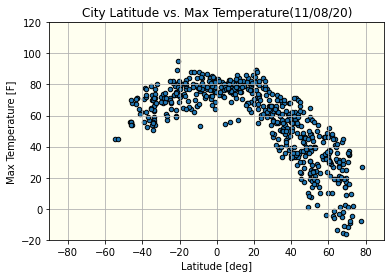

In [100]:
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], marker="o", s= 20, edgecolor='black')


figtitle =f"City Latitude vs. Max Temperature({now_date})"
plt.title(figtitle)
plt.ylabel("Max Temperature [F]")
plt.xlabel("Latitude [deg]")
plt.grid(True)
plt.xlim(-90,90)
plt.ylim(-20,120)

# Save the figure
plt.savefig("../output_data/Latitude.vs.MaxTemperature.png")
# Show plot
plt.show()

### Above scatter plot demonstrates how the temperature changes based on the latitude. Temperature rises going closer to the equator. As we move away from the equator on either directions,northern or the southern hemisphere, the temperature drops from high to low. 

## Latitude vs. Humidity Plot

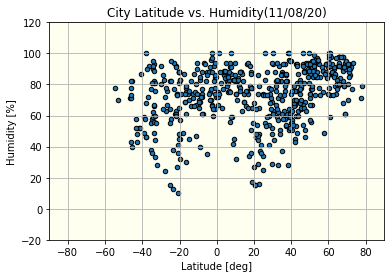

In [102]:
plt.scatter(cities_df["Lat"], cities_df["Humidity"], marker="o", s= 20, edgecolor='black')


figtitle =f"City Latitude vs. Humidity({now_date})"
plt.title(figtitle)

plt.ylabel("Humidity [%]")
plt.xlabel("Latitude [deg]")
plt.grid(True)
plt.xlim(-90,90)
plt.ylim(-20,120)

# Save the figure
plt.savefig("../output_data/Latitude.vs.Humidity.png")
# Show plot
plt.show()

### Above scatter plot demonstrates the humidity changes based on the latitude for each hemisphere. Humidity tends to be high closer to the north pole.

## Latitude vs. Cloudiness Plot

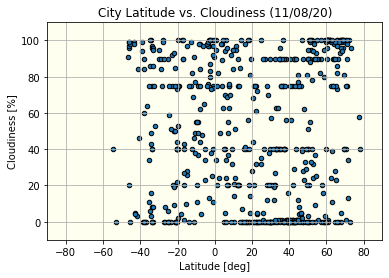

In [101]:
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], marker="o", s= 20, edgecolor='black')

# Incorporate the other graph properties
figtitle =f"City Latitude vs. Cloudiness ({now_date})"
plt.title(figtitle)

plt.ylabel("Cloudiness [%]")
plt.xlabel("Latitude [deg]")
plt.grid(True)
plt.xlim(-90,90)
plt.ylim(-10,110)

# Save the figure
plt.savefig("../output_data/Latitude.vs.Cloudiness.png")
# Show plot
plt.show()

#### Above scatter plot demonstrates the cloudiness changes based on the latitude. Cloudiness tends to be either 0 or 100% for majority locations.

## Latitude vs. Wind Speed Plot

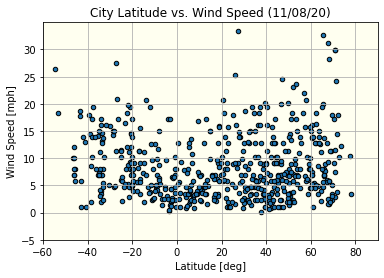

In [75]:
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], marker="o", s= 20, edgecolor='black')


figtitle =f"City Latitude vs. Wind Speed ({now_date})"
plt.title(figtitle)

plt.ylabel("Wind Speed [mph]")
plt.xlabel("Latitude [deg]")
plt.grid(True)
plt.xlim(-60,90)

minwind, maxwind = plt.ylim()
plt.ylim(-5,maxwind*1)

# Save the figure
plt.savefig("../output_data/Latitude.vs.WindSpeed.png")
# Show plot
plt.show()

#### Above scatter plot demonstrates the wind speed changes based on the latitude. Wind speed is on an average around 8 mph (pretty calm) compared to the highest windspeed of about 33 mph. As we move away from the equator the wind speed remains closely tied to the 0 to 10 mph.

## Linear Regression

In [103]:
# creating dataframes for hemispheres
northern_df = cities_df.loc[cities_df['Lat'] >= 0]
#northern_df.head()

southern_df = cities_df.loc[cities_df['Lat'] < 0]
#southern_df.head()

# Creating a function to help generate linear regression plots

def linregress_plot(x_values, y_values, x_label, y_label, x_annotation, y_annotation):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    plt.scatter(x_values,y_values)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(x_annotation,y_annotation),fontsize=12,color="red")
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-value is: {rvalue**2}")
    correlation = st.pearsonr(x_values, y_values)
    print(f"The correlation is: {correlation[0]}")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    #plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.715641456317112
The correlation is: -0.8459559423026194


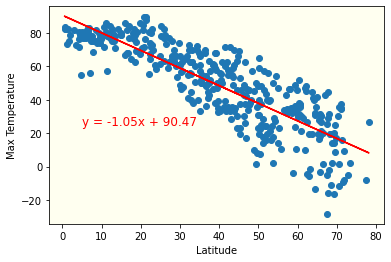

In [87]:
linregress_plot(northern_df['Lat'], northern_df['Max Temp'], 'Latitude', 'Max Temperature', 5, 25, )

plt.savefig('../output_data/NorthernHemisphere-MaxTemp.vs.Latitude-LinearRegression.PNG') 
plt.show()

##### As observed from the above plot, there is a strong negative correlation between latitude and maximum temperature in northen hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.36016234164142347
The correlation is: 0.6001352694529981


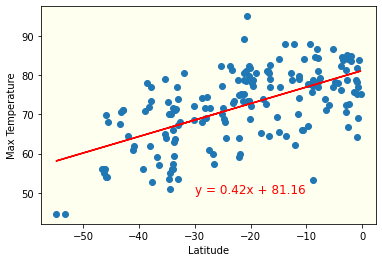

In [92]:
linregress_plot(southern_df['Lat'], southern_df['Max Temp'], 'Latitude', 'Max Temperature', -30, 50)

plt.savefig('../Output_data/SouthernHemisphere-MaxTemp.vs.Latitude-LinearRegression.PNG') 
plt.show()

##### As observed from the above plot, there is a moderate positive correlation between latitude and max temperature in southern hemisphere. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.09171995006382345
The correlation is: 0.3028530172605575


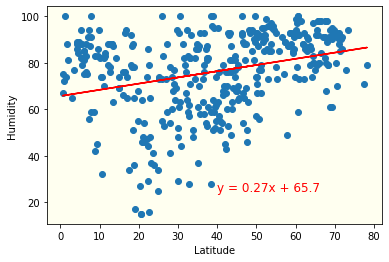

In [91]:
linregress_plot(northern_df['Lat'], northern_df['Humidity'], 'Latitude', 'Humidity', 40, 25)

plt.savefig('../Output_data/NorthernHemisphere-Humidity(%).vs.Latitude-LinearRegression.PNG') 
plt.show()

##### As observed from the above plot, there is a weak positive correlation between latitude and humidity in northern hemisphere. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.051761754070407534
The correlation is: 0.22751209653644244


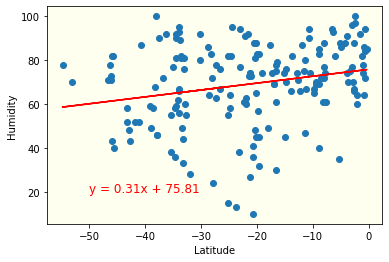

In [94]:
linregress_plot(southern_df['Lat'], southern_df['Humidity'], 'Latitude', 'Humidity', -50, 20)
plt.savefig('../Output_data/SouthernHemisphere-Humidity(%).vs.Latitude-LinearRegression.PNG') 
plt.show()

##### As observed from the above plot, there is very weak correlation between latitude and humidity in southern hemisphere.  The difference  between hemispheres is not significant enough to point out.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03672976446104937
The correlation is: 0.1916501094730953


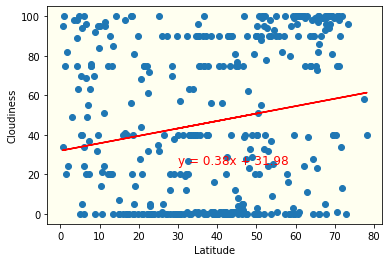

In [95]:
linregress_plot(northern_df['Lat'], northern_df['Cloudiness'], 'Latitude', 'Cloudiness', 30, 25)

plt.savefig('../Output_data/NorthernHemisphere-Cloudiness(%).vs.Latitude-LinearRegression.PNG') 
plt.show()

##### As observed from the above plot, there is a weak positive correlation between latitude and cloudiness in northern hemisphere. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.015358787913885358
The correlation is: 0.12393057699327208


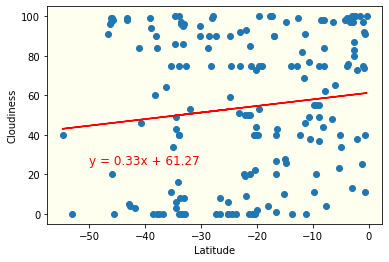

In [97]:
linregress_plot(southern_df['Lat'], southern_df['Cloudiness'], 'Latitude', 'Cloudiness', -50, 25)

plt.savefig('../Output_data/SouthernHemisphere-Cloudiness(%).vs.Latitude-LinearRegression.PNG') 
plt.show()

##### As observed from the above plot, there is a weak positive correlation between latitude and humidity in southern hemisphere. The difference between hemispheres is not significant enough to point out.¶

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.05002666126249128
The correlation is: 0.22366640620015182


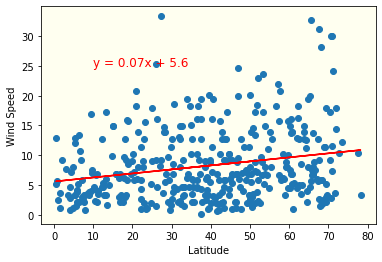

In [98]:
linregress_plot(northern_df['Lat'], northern_df['Wind Speed'], 'Latitude', 'Wind Speed', 10, 25)

plt.savefig('../Output_data/NorthernHemisphere-WindSpeed(mph).vs.Latitude-LinearRegression.PNG') 
plt.show()

##### As observed from the above plot, there is a very weak positive correlation between latitude and wind speed in northern hemisphere. It indicates that there is no relationship between wind speed and latitude.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.1345682685942763
The correlation is: -0.36683547891974166


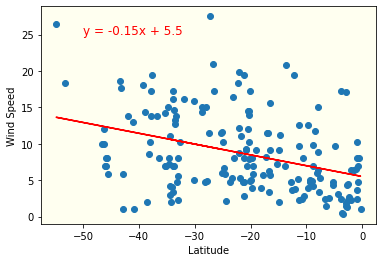

In [99]:
linregress_plot(southern_df['Lat'], southern_df['Wind Speed'], 'Latitude', 'Wind Speed', -50, 25)

plt.savefig('../Output_data/SouthernHemisphere-WindSpeed(mph).vs.Latitude-LinearRegression.PNG') 
plt.show()

##### As observed from the above plot,  there is a weak positive correlation between latitude and wind speed in southern hemisphere. It indicates that there is no relationship between wind speed and latitude. The difference between hemispheres is not significant enough to point out.¶